In [2]:
%load_ext tikzmagic

# 신경망 기초 이론

신경망(neural network) 모형은 기저 함수(basis function)도 모수(parameter) 값에 의해 변화할 수 있는 적응형 기저 함수 모형(adaptive basis function model)이며 구조적으로는 여러개의 퍼셉트론을 쌓아놓은 형태이므로 MLP(multi-layer perceptron)으로도 불린다.

## 퍼셉트론의 복습

다음 그림과 같이 독립 변수 벡터가 3차원인 간단한 퍼셉트론 모형을 가정한다.

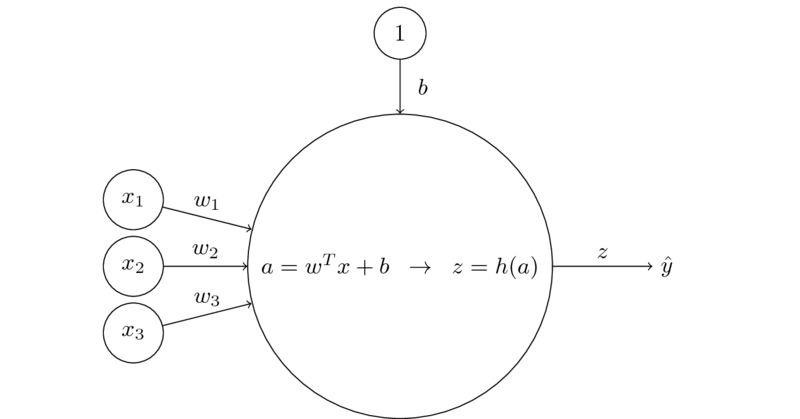

In [29]:
%%tikz -f png -s 800,1200
\tikzstyle{neuron}=[circle,draw,minimum size=20pt,inner sep=5pt, align=center]
\path (-2,-2) grid (10,4);

\node[neuron,minimum size=20pt] (node) at (4,0) {$a=w^Tx + b \;\; \rightarrow \;\; z=h(a)$};
\node[neuron] (b)  at (4,3.5) {$1$};
\node[neuron] (x1) at (0,1) {$x_1$};
\node[neuron] (x2) at (0,0) {$x_2$};
\node[neuron] (x3) at (0,-1) {$x_3$};
\node (output) at (8,0) {$\hat{y}$};

\draw[->] (b) -- node[right=0.4em] {$b$} (node);
\draw[->] (x1) -- node[above] {$w_1$} (node);
\draw[->] (x2) -- node[above] {$w_2$} (node);
\draw[->] (x3) -- node[above] {$w_3$} (node);
\draw[->] (node) -- node[above] {$z$} (output);

* 입력 $x$

$$ x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} $$

 
* 가중치  $w$

$$ w = \begin{bmatrix} w_1 \\ w_2 \\ w_3 \end{bmatrix} $$


* 바이어스(y 절편) $b$

$$b$$


* 활성화 함수 입력값 $a$

$$ a = \sum_{i=1}^3 w_i x_i + b = w^T x + b$$


* 활성화 함수(activation function) $h$ 와 활성화 함수 출력값 $z$

$$ z = h(a) = h \left( w^Tx + b \right) $$


* 최종 출력 $\hat{y}$

$$ \hat{y} = z $$

### 시그모이드 활성화 함수

일반적으로 활성화 함수 $h$로는 위와 아래가 막혀있는(bounded) 시그모이드 함수 $\sigma$를 사용하는데 가장 많이 사용하는 활성화 함수는 다음과 같은 로지스틱 함수이다.

$$ 
\begin{eqnarray} 
h(a) = \sigma(a) = \frac{1}{1+e^{-a}} 
\end{eqnarray} 
$$

시그모이드 함수의 미분은 다음처럼 쉽게 계산할 수 있다.

$$ \dfrac{d\sigma(a)}{da} = \sigma(a)(1-\sigma(a)) $$


### 비선형 기저 함수

이런 퍼셉트론에서 $x$ 대신 기저 함수 $\phi(x)$를 사용하면 XOR 문제 등의 비선형 문제를 해결할 수 있다. 그러나 고정된 기저 함수를 사용해야 하므로 문제에 맞는 기저 함수를 찾아야 한다는 단점이 있다. 따라서 $J$개의 많은 기저 함수를 사용하는 것이 보통이다.

 $$ z = h \left( \sum_{j=1}^J w_j \phi_j(x) + b \right) = h \left( w^T \phi(x) + b \right) $$
 

### 하이퍼 파라미터에 의해 모양이 바뀌는 비선형 기저 함수


만약 기저 함수 $\phi(x)$의 형태를 추가적인 모수 $\theta$를 사용하여 조절할 수 있다면 즉, 기저함수 $\phi(x; \theta)$ 를 사용하면 $\theta$ 값을 바꾸는 것만으로 다양한 모양의 기저 함수를 시도할 수 있다.

$$ z = h \left( w^T \phi(x ; \theta) + b \right) $$
 
신경망 즉, MLP(Multi-Layer Perceptron)은 다음과 같이 퍼셉트론과 같은 형태의 적응형 기저함수를 사용한 모형이다.

$$ 
\phi_j(x ; \theta_j) = \phi_j(x ; w^{(1)}_j, {b}^{(1)}_j) 
= h \left(w_{j}^{(1)} x + b_j^{(1)} \right)  
$$

즉 전체 모형은 다음과 같다.

$$ z = h \left( \sum_{j=1}^M w_j h \left(w_{j}^{(1)} x + b_j^{(1)} \right)  + b \right) $$

## 복수의 퍼셉트론을 사용한 XOR 문제 해결

퍼셉트론을 연속적으로 연결하여 비선형 문제를 해결하는 방법은 이미 디지털 회로 설계에서 사용되던 방법이다. 디지털 회로는 AND, OR 등의 디지털 게이트(gate)를 이어서 복잡한 디지털 연산을 하는 회로를 만드는 방법이다.


<table style="display: inline-table; margin-right: 30pt;">
<tbody><tr style="text-align:center;">
<td colspan="2" style="text-align:center;"><b>INPUT</b></td>
<td colspan="3" style="text-align:center;"><b>OUTPUT</b></td>
</tr>
<tr style="text-align:center;">
<td>x1</td>
<td>x2</td>
<td>AND</td>
<td>NAND</td>
<td>XOR</td>
</tr>
<tr style="text-align:center;">
<td>0</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr style="text-align:center;">
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>
<tr style="text-align:center;">
<td>1</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>
<tr style="text-align:center;">
<td>1</td>
<td>1</td>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
</tbody></table>


퍼셉트론의 가중치를 적절히 조정하면 임의의 디지털 게이트를 제작할 수 있다. 예를 들어 $w_1 = -2$, $w_2 = -2$, $b = 3$ 인 퍼셉트론은 NAND 게이트를 구현한다.

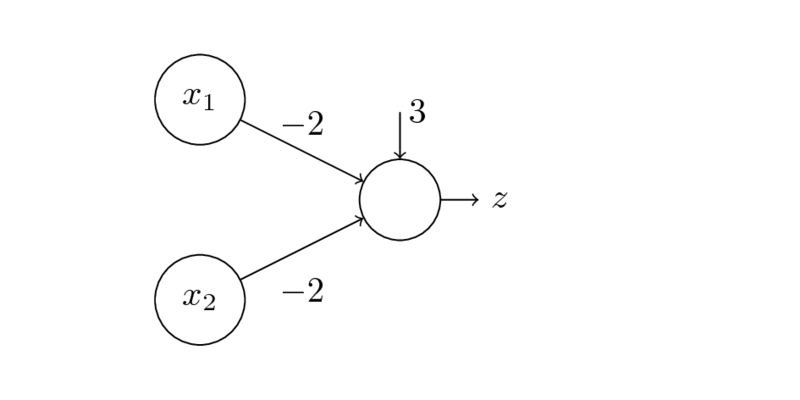

In [33]:
%%tikz -f png -s 800,1200

\tikzstyle{neuron}=[circle, draw, minimum size=23pt,inner sep=5pt, node distance=2cm]

\path (-4,-2) grid (4,2);

\node[neuron] (node) at (0, 0) {};
\node[neuron] (x1) at (-2, 1) {$x_1$};
\node[neuron] (x2) at (-2, -1) {$x_2$};
\node (b) at (0, 1)  {};
\node (output) [right of=node] {$z$};
\draw[->] (b) -- node[right=0.5em, above=0.1] {$3$} (node);
\draw[->] (x2) -- node[below=0.5em] {$-2$} (node);
\draw[->] (x1) -- node[above=0.1] {$-2$} (node);
\draw[->] (node) -- (output);

* $x_1 = 0$, $x_2 = 0$
 * $ (−2)\times 0+(−2)\times 0+3=3 > 0 \rightarrow 1$
 
 
* $x_1 = 0$, $x_2 = 1$
 * $ (−2)\times 0+(−2)\times 1+3=1 > 0 \rightarrow 1$
 
 
* $x_1 = 1$, $x_2 = 0$
 * $ (−2)\times 1+(−2)\times 0+3=1 > 0 \rightarrow 1$
 
 
* $x_1 = 1$, $x_2 = 1$
 * $ (−2)\times 1+(−2)\times 1+3=-1 < 0 \rightarrow 0$


디지털 회로에서는 복수개의 NAND 게이트를 조합하면 어떤 디지털 로직이라도 구현 가능하다. 예를 들어 다음 회로는 두 입력 신호의 합과 자릿수를 반환하는 반가산기(half adder) 회로이다.

<img src="https://datascienceschool.net/upfiles/3002b65c9f034818a318ad7f6b09671f.png">

이 퍼셉트론 조합을 보면 4개의 퍼셉트론을 연결하여 XOR 로직을 구현하였음을 알 수 있다.

## 다계층 퍼셉트론

신경망은 퍼셉트론을 여러개 연결한 것으로 다계층 퍼셉트론(MLP: Multi-Layer Perceptrons)이라고도 한다. 신경망에 속한 퍼셉트론은 뉴론(neuron) 또는 노드(node)라고 불린다.

각 계층(layer)은 다음 계층에 대해 적응형 기저 함수의 역할을 한다. 최초의 계층은 입력 계층(input layer), 마지막 계측은 출력 계층(output layer)이라고 하며 중간은 은닉 계층(hidden layer)라고 한다.

<img src="https://datascienceschool.net/upfiles/4dcef7b75de64023900c7f7edb7cbb2f.png">

MLP의 또다른 특징은 출력 계층에 복수개의 출력 뉴런를 가지고 각 뉴런값으로 출력 클래스의 조건부 확률을 반환하도록 설계하여 멀티 클래스 문제를 해결할 수도 있다는 점이다.

다음은 필기 숫자에 대한 영상 정보를 입력 받아 숫자 0 ~ 9 까지의 조건부 확률을 출력하는 MLP의 예이다. 입력 영상이 28 x 28 해상도를 가진다면 입력 계층의 뉴런 수는 $28 \times 28 = 784$ 개가 된다. 출력은 숫자 0 ~ 9 까지의 조건부 확률을 출력하는 $10$ 개의 뉴런을 가진다.

그림의 모형은 $15$개의 뉴런을 가지는 $1$ 개의 은닉 계층을 가진다.

<img src="https://datascienceschool.net/upfiles/90f2752671424cef846839b89ddcf6aa.png">


## 신경망 가중치 표기법

신경망의 가중치는 $w^{(l)}_{j,i}$ 과 같이 표기한다. 이 가중치는  $l-1$ 번째 계층의  $i$번째 뉴런와 $l$ 번째 계층의 $j$번째 뉴런을 연결하는 가중치를 뜻한다. 첨자의 순서에 주의한다.


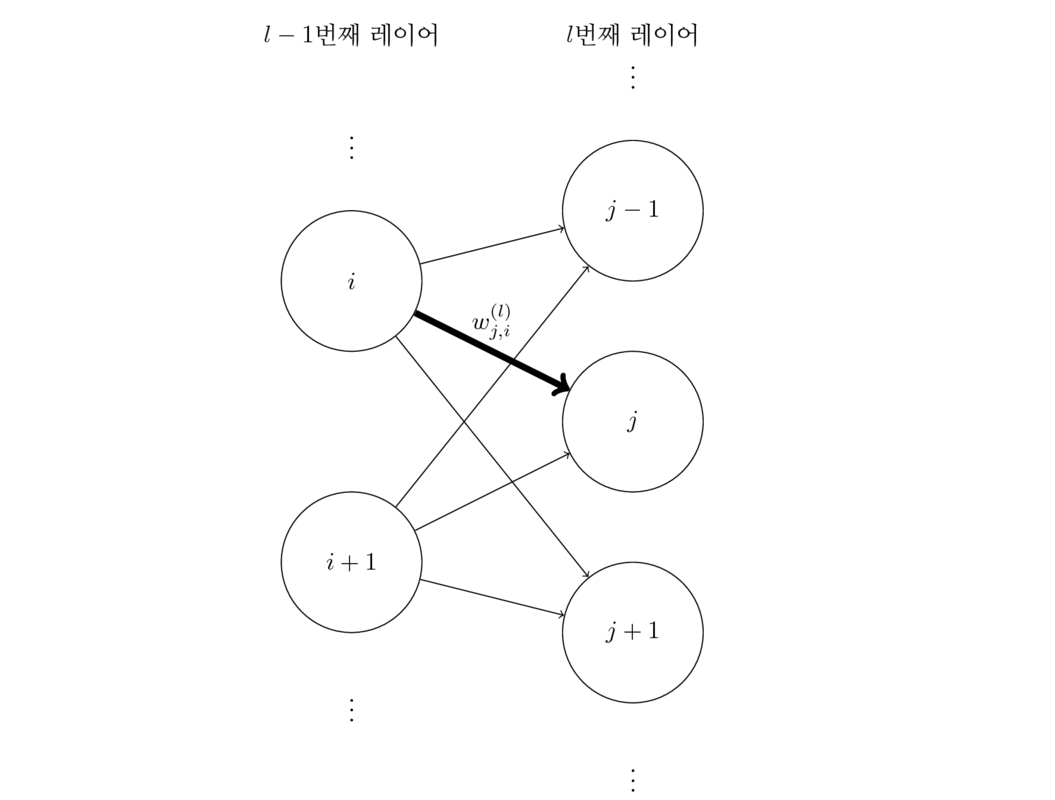

In [48]:
%%tikz --size 1200,800 -p kotex -e utf-8

\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\path (-5, -5) grid (10, 6);

\node () at (0, 5.5) {$l-1$번째 레이어};
\node () at (4, 5.5) {$l$번째 레이어};

\node (i0) at (0,  4) {$\vdots$};
\node[neuron] (i1) at (0,  2) {$i$};
\node[neuron] (i2) at (0, -2) {$i+1$};
\node (i3) at (0,  -4) {$\vdots$};

\node (h10) at (4,  5) {$\vdots$};
\node[neuron] (h11) at (4,  3) {$j-1$};
\node[neuron] (h12) at (4,  0) {$j$};
\node[neuron] (h13) at (4, -3) {$j+1$};
\node (h14) at (4,  -5) {$\vdots$};

\draw[->] (i1) -- (h11);
\draw[->] (i2) -- (h11);
\draw[->, line width=0.9mm] (i1) -- node[above=0.2] {$w^{(l)}_{j,i}$ } (h12);
\draw[->] (i2) -- (h12);
\draw[->] (i1) -- (h13);
\draw[->] (i2) -- (h13);

## 순방향 전파

신경망의 계산 과정은 실제 신경망에서 신호가 전달과는 과정과 유사하므로 순방향 전파(feedforward propagation)라고 한다.

$l-1$번째 계층의 출력과 $l$번째 계층의 출력은 다음과 같은 관계를 가진다.

$$
a^{(l)} = {W^{(l)}} z^{(l-1)} + b^{(l)}
$$

$$
z^{(l)} = h(a^{(l)})
$$

하나의 식으로 붙이면 다음과 같다.

$$
z^{(l)} = h\left({W^{(l)}} z^{(l-1)} + b^{(l)}\right)
$$

가장 첫번째 레이어 즉, 0번째 레이어의 출력은 입력 데이터 그 자체이다.

$$
z^{(0)} = x
$$

가장 마지막 레이어 즉 $L$번째 레이어의 출력은 최종 출력이 된다. 

$$
\hat{y} = z^{(L)}
$$

아래에 순방향 전파의 예를 보였다.

### 단계 1

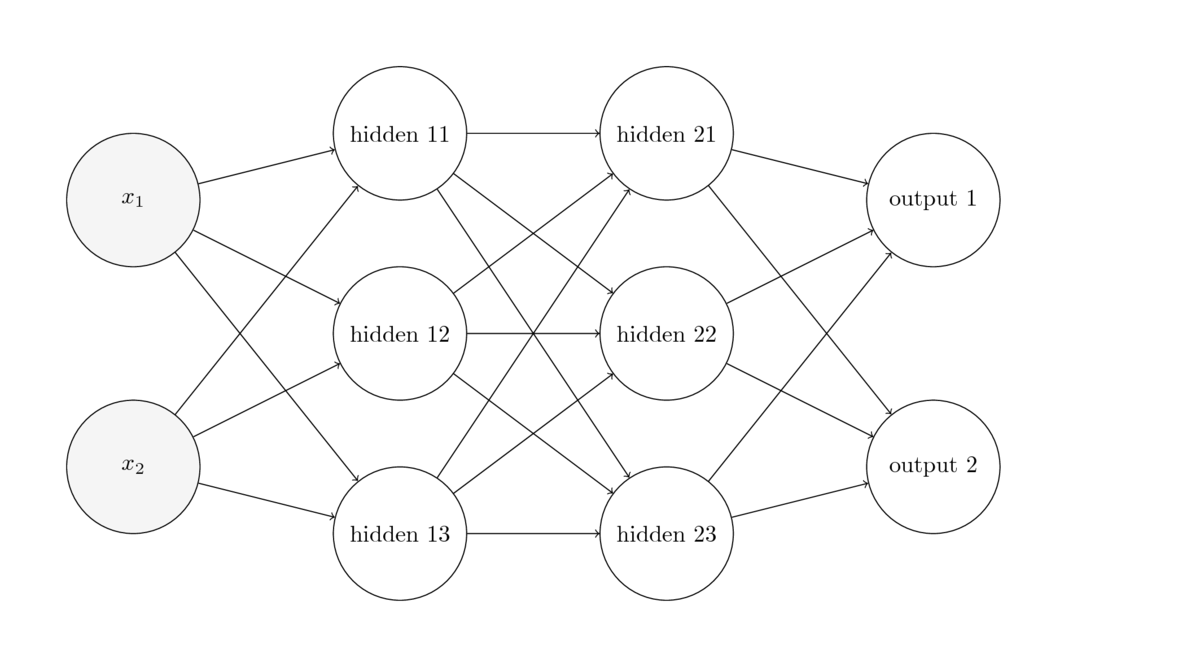

In [3]:
%%tikz --size 1200,800
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\path (-2, -5) grid (16, 5);

\node[neuron, fill=gray!10] (i1) at (0,  2) {$x_1$};
\node[neuron, fill=gray!10] (i2) at (0, -2) {$x_2$};

\node[neuron] (h11) at (4,  3) {hidden 11};
\node[neuron] (h12) at (4,  0) {hidden 12};
\node[neuron] (h13) at (4, -3) {hidden 13};
\draw[->] (i1) -- (h11);
\draw[->] (i2) -- (h11);
\draw[->] (i1) -- (h12);
\draw[->] (i2) -- (h12);
\draw[->] (i1) -- (h13);
\draw[->] (i2) -- (h13);

\node[neuron] (h21) at (8,  3) {hidden 21};
\node[neuron] (h22) at (8,  0) {hidden 22};
\node[neuron] (h23) at (8, -3) {hidden 23};
\draw[->] (h11) -- (h21);
\draw[->] (h11) -- (h22);
\draw[->] (h11) -- (h23);
\draw[->] (h12) -- (h21);
\draw[->] (h12) -- (h22);
\draw[->] (h12) -- (h23);
\draw[->] (h13) -- (h21);
\draw[->] (h13) -- (h22);
\draw[->] (h13) -- (h23);

\node[neuron] (o1) at (12,  2) {output 1};
\node[neuron] (o2) at (12, -2) {output 2};
\draw[->] (h21) -- (o1);
\draw[->] (h21) -- (o2);
\draw[->] (h22) -- (o1);
\draw[->] (h22) -- (o2);
\draw[->] (h23) -- (o1);
\draw[->] (h23) -- (o2);

### 단계 2

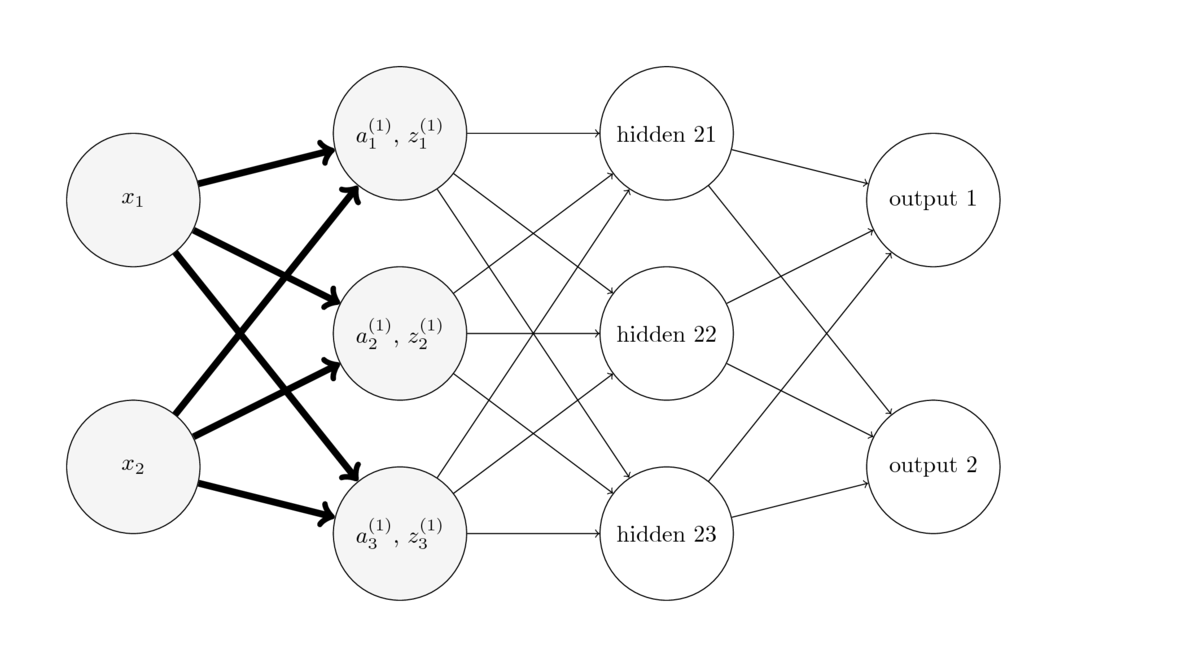

In [4]:
%%tikz --size 1200,800
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\path (-2, -5) grid (16, 5);

\node[neuron, fill=gray!10] (i1) at (0,  2) {$x_1$};
\node[neuron, fill=gray!10] (i2) at (0, -2) {$x_2$};

\node[neuron, fill=gray!10] (h11) at (4,  3) {$a^{(1)}_1$, $z^{(1)}_1$};
\node[neuron, fill=gray!10] (h12) at (4,  0) {$a^{(1)}_2$, $z^{(1)}_2$};
\node[neuron, fill=gray!10] (h13) at (4, -3) {$a^{(1)}_3$, $z^{(1)}_3$};
\draw[->, line width=1mm] (i1) -- (h11);
\draw[->, line width=1mm] (i2) -- (h11);
\draw[->, line width=1mm] (i1) -- (h12);
\draw[->, line width=1mm] (i2) -- (h12);
\draw[->, line width=1mm] (i1) -- (h13);
\draw[->, line width=1mm] (i2) -- (h13);

\node[neuron] (h21) at (8,  3) {hidden 21};
\node[neuron] (h22) at (8,  0) {hidden 22};
\node[neuron] (h23) at (8, -3) {hidden 23};
\draw[->] (h11) -- (h21);
\draw[->] (h11) -- (h22);
\draw[->] (h11) -- (h23);
\draw[->] (h12) -- (h21);
\draw[->] (h12) -- (h22);
\draw[->] (h12) -- (h23);
\draw[->] (h13) -- (h21);
\draw[->] (h13) -- (h22);
\draw[->] (h13) -- (h23);

\node[neuron] (o1) at (12,  2) {output 1};
\node[neuron] (o2) at (12, -2) {output 2};
\draw[->] (h21) -- (o1);
\draw[->] (h21) -- (o2);
\draw[->] (h22) -- (o1);
\draw[->] (h22) -- (o2);
\draw[->] (h23) -- (o1);
\draw[->] (h23) -- (o2);

$$ z^{(1)} = h \left( {W^{(1)}} x + b^{(1)} \right) = h \left( a^{(1)} \right)$$

### 단계 3

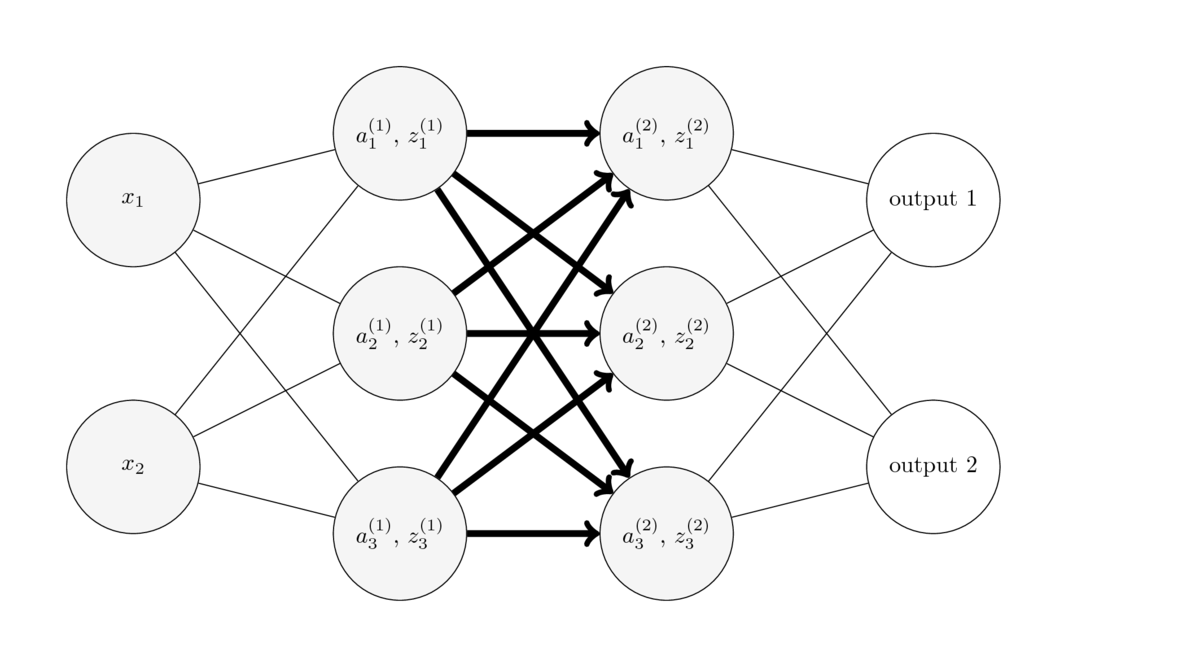

In [5]:
%%tikz --size 1200,800
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\path (-2, -5) grid (16, 5);

\node[neuron, fill=gray!10] (i1) at (0,  2) {$x_1$};
\node[neuron, fill=gray!10] (i2) at (0, -2) {$x_2$};

\node[neuron, fill=gray!10] (h11) at (4,  3) {$a^{(1)}_1$, $z^{(1)}_1$};
\node[neuron, fill=gray!10] (h12) at (4,  0) {$a^{(1)}_2$, $z^{(1)}_2$};
\node[neuron, fill=gray!10] (h13) at (4, -3) {$a^{(1)}_3$, $z^{(1)}_3$};
\draw[-] (i1) -- (h11);
\draw[-] (i2) -- (h11);
\draw[-] (i1) -- (h12);
\draw[-] (i2) -- (h12);
\draw[-] (i1) -- (h13);
\draw[-] (i2) -- (h13);

\node[neuron, fill=gray!10] (h21) at (8,  3) {$a^{(2)}_1$, $z^{(2)}_1$};
\node[neuron, fill=gray!10] (h22) at (8,  0) {$a^{(2)}_2$, $z^{(2)}_2$};
\node[neuron, fill=gray!10] (h23) at (8, -3) {$a^{(2)}_3$, $z^{(2)}_3$};
\draw[->, line width=1mm] (h11) -- (h21);
\draw[->, line width=1mm] (h11) -- (h22);
\draw[->, line width=1mm] (h11) -- (h23);
\draw[->, line width=1mm] (h12) -- (h21);
\draw[->, line width=1mm] (h12) -- (h22);
\draw[->, line width=1mm] (h12) -- (h23);
\draw[->, line width=1mm] (h13) -- (h21);
\draw[->, line width=1mm] (h13) -- (h22);
\draw[->, line width=1mm] (h13) -- (h23);

\node[neuron] (o1) at (12,  2) {output 1};
\node[neuron] (o2) at (12, -2) {output 2};
\draw[-] (h21) -- (o1);
\draw[-] (h21) -- (o2);
\draw[-] (h22) -- (o1);
\draw[-] (h22) -- (o2);
\draw[-] (h23) -- (o1);
\draw[-] (h23) -- (o2);

$$ z^{(2)} = h \left( {W^{(2)}} z^{(1)} + b^{(2)} \right) = h \left( a^{(2)} \right)$$

### 단계 4

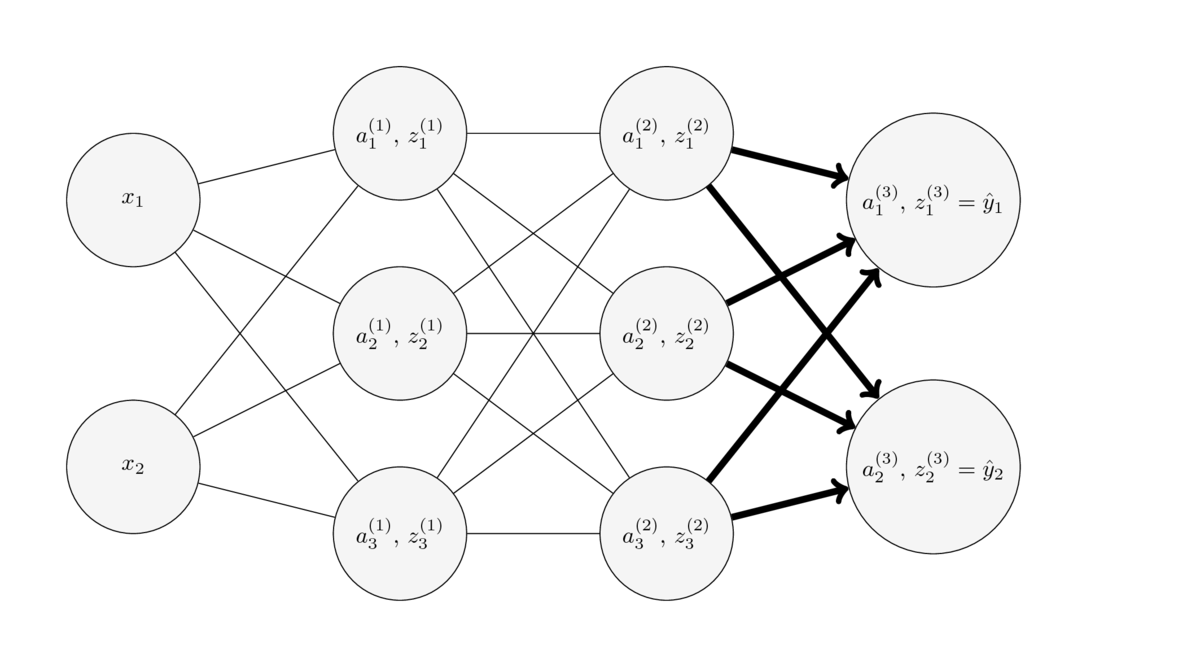

In [6]:
%%tikz --size 1200,800
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\path (-2, -5) grid (16, 5);

\node[neuron, fill=gray!10] (i1) at (0,  2) {$x_1$};
\node[neuron, fill=gray!10] (i2) at (0, -2) {$x_2$};

\node[neuron, fill=gray!10] (h11) at (4,  3) {$a^{(1)}_1$, $z^{(1)}_1$};
\node[neuron, fill=gray!10] (h12) at (4,  0) {$a^{(1)}_2$, $z^{(1)}_2$};
\node[neuron, fill=gray!10] (h13) at (4, -3) {$a^{(1)}_3$, $z^{(1)}_3$};
\draw[-] (i1) -- (h11);
\draw[-] (i2) -- (h11);
\draw[-] (i1) -- (h12);
\draw[-] (i2) -- (h12);
\draw[-] (i1) -- (h13);
\draw[-] (i2) -- (h13);

\node[neuron, fill=gray!10] (h21) at (8,  3) {$a^{(2)}_1$, $z^{(2)}_1$};
\node[neuron, fill=gray!10] (h22) at (8,  0) {$a^{(2)}_2$, $z^{(2)}_2$};
\node[neuron, fill=gray!10] (h23) at (8, -3) {$a^{(2)}_3$, $z^{(2)}_3$};
\draw[-] (h11) -- (h21);
\draw[-] (h11) -- (h22);
\draw[-] (h11) -- (h23);
\draw[-] (h12) -- (h21);
\draw[-] (h12) -- (h22);
\draw[-] (h12) -- (h23);
\draw[-] (h13) -- (h21);
\draw[-] (h13) -- (h22);
\draw[-] (h13) -- (h23);

\node[neuron, fill=gray!10] (o1) at (12,  2) {$a^{(3)}_1$, $z^{(3)}_1=\hat{y}_1$};
\node[neuron, fill=gray!10] (o2) at (12, -2) {$a^{(3)}_2$, $z^{(3)}_2=\hat{y}_2$};
\draw[->, line width=1mm] (h21) -- (o1);
\draw[->, line width=1mm] (h21) -- (o2);
\draw[->, line width=1mm] (h22) -- (o1);
\draw[->, line width=1mm] (h22) -- (o2);
\draw[->, line width=1mm] (h23) -- (o1);
\draw[->, line width=1mm] (h23) -- (o2);

$$ \hat{y} = z^{(3)} = h \left( {W^{(3)}} z^{(2)} + b^{(3)} \right) = h \left( a^{(3)} \right)$$

## 오차 함수

신경망의 오차 함수는 조건부 확률이라는 실수 값을 출력해야 하므로  퍼셉트론과 달리 제곱합 오차 함수를 사용한다.

$$
\begin{eqnarray}  C(w,b) = \sum_{i=1}^N C_i(w,b) = 
  \sum_{i=1}^N \| y_i - \hat{y}(x_i; w, b)\|^2 =  \sum_{i=1}^N \| y_i - z_i^{(L)} \|^2 
\end{eqnarray}
$$


## 가중치 최적화 

오차함수를 최소화하는 최적의 가중치를 찾기 위해 다음과 같이 미분(gradient)을 사용한 steepest gradient descent 방법을 적용한다. 가중치 갱신 공식은 다음과 같다. 여기에서 $\mu$는 최적화 step size이다.

$$
\begin{eqnarray}
  w_{k+1}  &=& w_{k} - \mu \frac{\partial C}{\partial w} \\
  b_{k+1} &=& b_{k} - \mu \frac{\partial C}{\partial b}
\end{eqnarray}
$$

## 역전파

단순하게 수치적으로 미분을 계산한다면 모든 가중치에 대해서 개별적으로 미분을 계산해야 한다. 그러나 역전파(back propagation) 방법을 사용하면 모든 가중치에 대한 미분값을 한번에 계산할 수 있다.

역전파 방법을 수식으로 표현하면 다음과 같다.

우선 $\delta$ 를 뒤에서 앞으로 전파한다. $\delta$는 다음과 같이 정의되는 값이다.

$$
\delta_j^{(l)} = \dfrac{\partial C}{\partial a_j^{(l)}}
$$


$$
\begin{eqnarray}
  \delta^{(l-1)}_j = h'(a^{(l-1)}_j) \sum_i w^{(l)}_{ij} \delta^{(l)}_i
\end{eqnarray}
$$


이 식을 벡터-행렬 식으로 쓰면 다음과 같다.

$$
\delta^{(l-1)} = h'(a^{(l-1)}) \odot ({W^T}^{(l)} \delta^{(l)}) 
$$

여기에서 $\odot$ 연산 기호는 Hamadard Product, Schur product , 혹은 element-wise product 라고 불리는 연산으로 정의는 다음과 같다. 즉 NumPy 의 일반적인 배열 곱과 같다.

$$
x \odot y = 
\left(\begin{array}{c} x_1 \\ x_2 \\ x_3 \end{array}\right) \odot
\left(\begin{array}{c} y_1 \\ y_2 \\ y_3 \end{array}\right) 
= \left(\begin{array}{c} x_1 y_1 \\ x_2 y_2 \\ x_3 y_3 \end{array}\right)
$$

만약 코스트 함수가 다음과 같다면 

$$ C = \dfrac{1}{2}(y - z)^2 $$

최종단의 $\delta$는  다음과 같이 예측 오차(error) 그 자체이다.

$$
\delta^{(L)}_j = y_j - z_j
$$

따라서 역전파를 오차 역전파(error back propagation)라고도 한다.



오차값에서 가중치에 대한 미분은 다음과 같이 구한다.

$$
\frac{\partial C}{\partial w^{(l)}_{ji}} = \delta^{(l)}_j z^{(l-1)}_i 
$$


따라서 오차값을 위 식에 따라 앞쪽으로 다시 전파하면 전체 가중치에 대한 미분을 구할 수 있다.

또 바이어스에 대한 미분은 $\delta$와 같다.

$$
\frac{\partial C}{\partial b^{(l)}_{j}} = \delta^{(l)}_j 
$$


### 단계 1

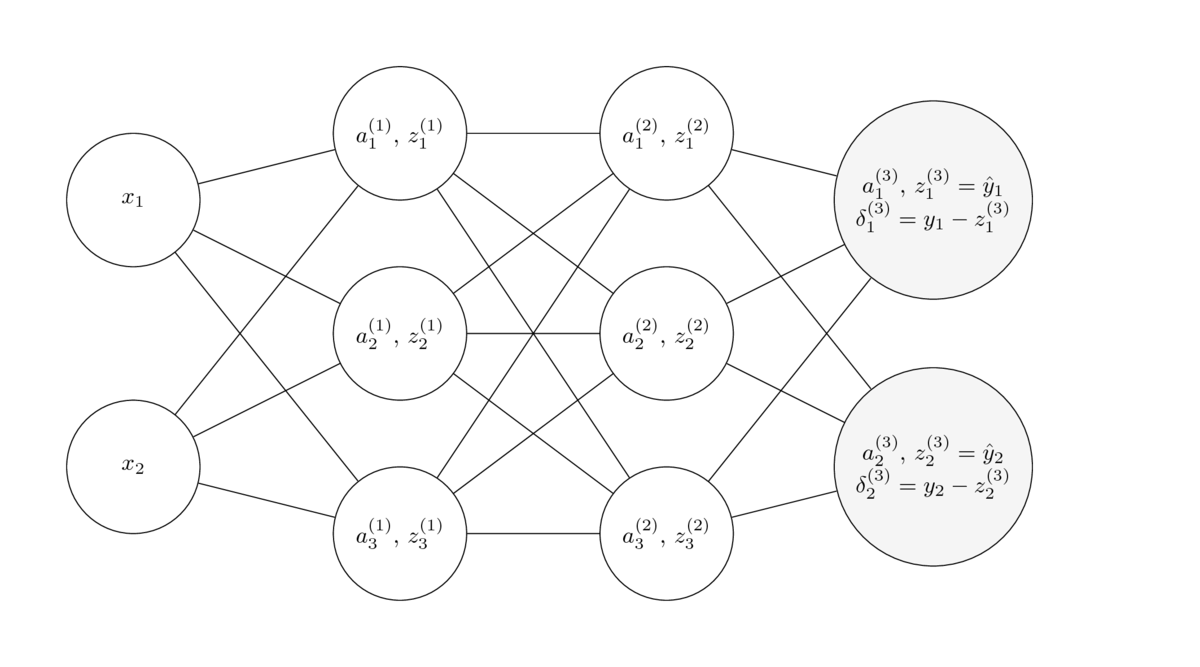

In [49]:
%%tikz --size 1200,800
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm, align=center]

\path (-2, -5) grid (16, 5);

\node[neuron] (i1) at (0,  2) {$x_1$};
\node[neuron] (i2) at (0, -2) {$x_2$};

\node[neuron] (h11) at (4,  3) {$a^{(1)}_1$, $z^{(1)}_1$};
\node[neuron] (h12) at (4,  0) {$a^{(1)}_2$, $z^{(1)}_2$};
\node[neuron] (h13) at (4, -3) {$a^{(1)}_3$, $z^{(1)}_3$};
\draw[-] (i1) -- (h11);
\draw[-] (i2) -- (h11);
\draw[-] (i1) -- (h12);
\draw[-] (i2) -- (h12);
\draw[-] (i1) -- (h13);
\draw[-] (i2) -- (h13);

\node[neuron] (h21) at (8,  3) {$a^{(2)}_1$, $z^{(2)}_1$};
\node[neuron] (h22) at (8,  0) {$a^{(2)}_2$, $z^{(2)}_2$};
\node[neuron] (h23) at (8, -3) {$a^{(2)}_3$, $z^{(2)}_3$};
\draw[-] (h11) -- (h21);
\draw[-] (h11) -- (h22);
\draw[-] (h11) -- (h23);
\draw[-] (h12) -- (h21);
\draw[-] (h12) -- (h22);
\draw[-] (h12) -- (h23);
\draw[-] (h13) -- (h21);
\draw[-] (h13) -- (h22);
\draw[-] (h13) -- (h23);

\node[neuron, fill=gray!10] (o1) at (12,  2) {$a^{(3)}_1$, $z^{(3)}_1=\hat{y}_1$ \\ $\delta^{(3)}_1 = y_1 - z^{(3)}_1$};
\node[neuron, fill=gray!10] (o2) at (12, -2) {$a^{(3)}_2$, $z^{(3)}_2=\hat{y}_2$ \\ $\delta^{(3)}_2 = y_2 - z^{(3)}_2$};
\draw[-] (h21) -- (o1);
\draw[-] (h21) -- (o2);
\draw[-] (h22) -- (o1);
\draw[-] (h22) -- (o2);
\draw[-] (h23) -- (o1);
\draw[-] (h23) -- (o2);

$$
\delta^{(3)} = y - z^{(3)}
$$


### 단계 2

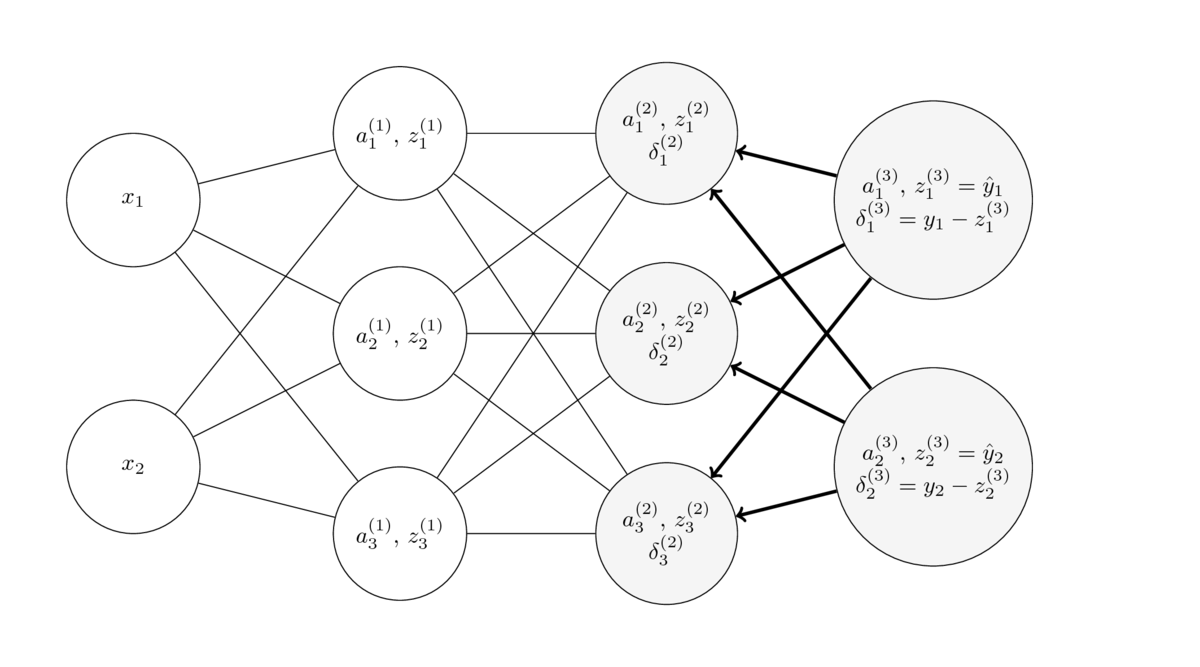

In [50]:
%%tikz --size 1200,800
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm, align=center]

\path (-2, -5) grid (16, 5);

\node[neuron] (i1) at (0,  2) {$x_1$};
\node[neuron] (i2) at (0, -2) {$x_2$};

\node[neuron] (h11) at (4,  3) {$a^{(1)}_1$, $z^{(1)}_1$};
\node[neuron] (h12) at (4,  0) {$a^{(1)}_2$, $z^{(1)}_2$};
\node[neuron] (h13) at (4, -3) {$a^{(1)}_3$, $z^{(1)}_3$};
\draw[-] (i1) -- (h11);
\draw[-] (i2) -- (h11);
\draw[-] (i1) -- (h12);
\draw[-] (i2) -- (h12);
\draw[-] (i1) -- (h13);
\draw[-] (i2) -- (h13);

\node[neuron, fill=gray!10] (h21) at (8,  3) {$a^{(2)}_1$, $z^{(2)}_1$ \\ $\delta^{(2)}_1$};
\node[neuron, fill=gray!10] (h22) at (8,  0) {$a^{(2)}_2$, $z^{(2)}_2$ \\ $\delta^{(2)}_2$};
\node[neuron, fill=gray!10] (h23) at (8, -3) {$a^{(2)}_3$, $z^{(2)}_3$ \\ $\delta^{(2)}_3$};
\draw[-] (h11) -- (h21);
\draw[-] (h11) -- (h22);
\draw[-] (h11) -- (h23);
\draw[-] (h12) -- (h21);
\draw[-] (h12) -- (h22);
\draw[-] (h12) -- (h23);
\draw[-] (h13) -- (h21);
\draw[-] (h13) -- (h22);
\draw[-] (h13) -- (h23);

\node[neuron, fill=gray!10] (o1) at (12,  2) {$a^{(3)}_1$, $z^{(3)}_1=\hat{y}_1$ \\ $\delta^{(3)}_1 = y_1 - z^{(3)}_1$};
\node[neuron, fill=gray!10] (o2) at (12, -2) {$a^{(3)}_2$, $z^{(3)}_2=\hat{y}_2$ \\ $\delta^{(3)}_2 = y_2 - z^{(3)}_2$};
\draw[<-, line width=0.5mm] (h21) -- (o1);
\draw[<-, line width=0.5mm] (h21) -- (o2);
\draw[<-, line width=0.5mm] (h22) -- (o1);
\draw[<-, line width=0.5mm] (h22) -- (o2);
\draw[<-, line width=0.5mm] (h23) -- (o1);
\draw[<-, line width=0.5mm] (h23) -- (o2);

$$ \frac{\partial C}{\partial w^{(3)}_{jk}} = z^{(2)}_k \delta^{(3)}_j $$

$$ \delta^{(2)} = h'(a^{(2)}) \odot ((W^{(3)})^T \delta^{(3)}) $$

### 단계 3

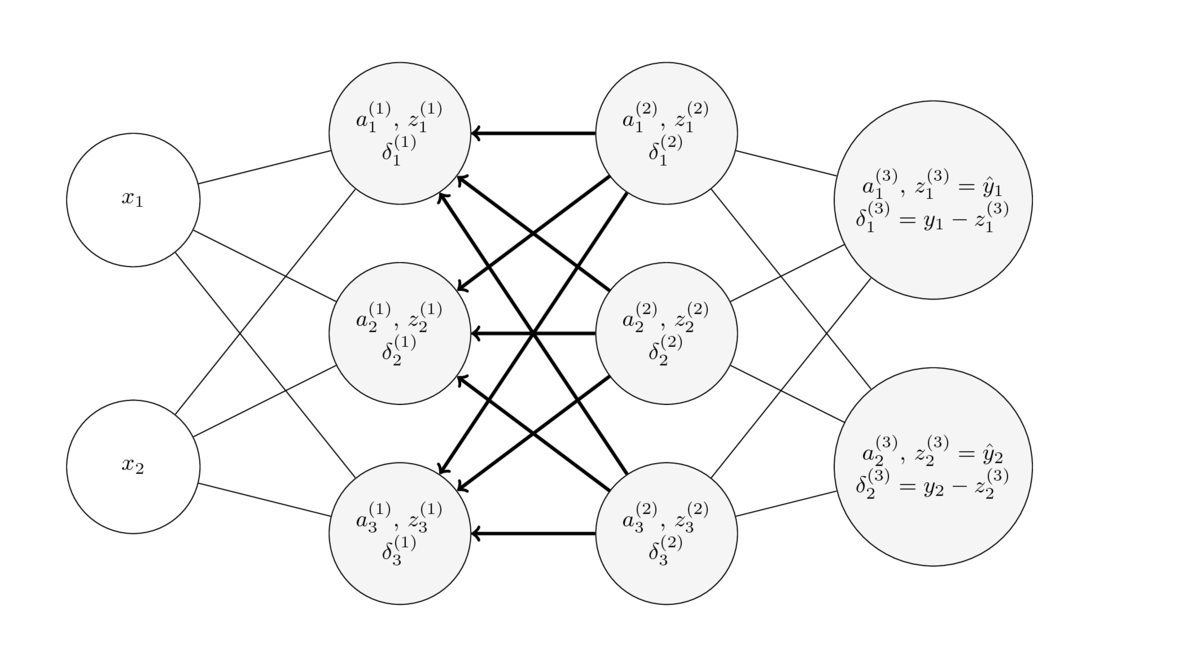

In [51]:
%%tikz --size 1200,800
\tikzstyle{neuron}=[circle,draw,minimum size=2 cm,inner sep=5pt,node distance=2cm,align=center]

\path (-2, -5) grid (16, 5);

\node[neuron] (i1) at (0,  2) {$x_1$};
\node[neuron] (i2) at (0, -2) {$x_2$};

\node[neuron, fill=gray!10] (h11) at (4,  3) {$a^{(1)}_1$, $z^{(1)}_1$ \\ $\delta^{(1)}_1$};
\node[neuron, fill=gray!10] (h12) at (4,  0) {$a^{(1)}_2$, $z^{(1)}_2$ \\ $\delta^{(1)}_2$};
\node[neuron, fill=gray!10] (h13) at (4, -3) {$a^{(1)}_3$, $z^{(1)}_3$ \\ $\delta^{(1)}_3$};
\draw[-] (i1) -- (h11);
\draw[-] (i2) -- (h11);
\draw[-] (i1) -- (h12);
\draw[-] (i2) -- (h12);
\draw[-] (i1) -- (h13);
\draw[-] (i2) -- (h13);

\node[neuron, fill=gray!10] (h21) at (8,  3) {$a^{(2)}_1$, $z^{(2)}_1$ \\ $\delta^{(2)}_1$};
\node[neuron, fill=gray!10] (h22) at (8,  0) {$a^{(2)}_2$, $z^{(2)}_2$ \\ $\delta^{(2)}_2$};
\node[neuron, fill=gray!10] (h23) at (8, -3) {$a^{(2)}_3$, $z^{(2)}_3$ \\ $\delta^{(2)}_3$};
\draw[<-, line width=0.5mm] (h11) -- (h21);
\draw[<-, line width=0.5mm] (h11) -- (h22);
\draw[<-, line width=0.5mm] (h11) -- (h23);
\draw[<-, line width=0.5mm] (h12) -- (h21);
\draw[<-, line width=0.5mm] (h12) -- (h22);
\draw[<-, line width=0.5mm] (h12) -- (h23);
\draw[<-, line width=0.5mm] (h13) -- (h21);
\draw[<-, line width=0.5mm] (h13) -- (h22);
\draw[<-, line width=0.5mm] (h13) -- (h23);

\node[neuron, fill=gray!10] (o1) at (12,  2) {$a^{(3)}_1$, $z^{(3)}_1=\hat{y}_1$ \\ $\delta^{(3)}_1 = y_1 - z^{(3)}_1$};
\node[neuron, fill=gray!10] (o2) at (12, -2) {$a^{(3)}_2$, $z^{(3)}_2=\hat{y}_2$ \\ $\delta^{(3)}_2 = y_2 - z^{(3)}_2$};
\draw[-] (h21) -- (o1);
\draw[-] (h21) -- (o2);
\draw[-] (h22) -- (o1);
\draw[-] (h22) -- (o2);
\draw[-] (h23) -- (o1);
\draw[-] (h23) -- (o2);

$$ \frac{\partial C}{\partial w^{(2)}_{jk}} = z^{(1)}_k \delta^{(2)}_j $$

$$ \delta^{(1)} = h'(a^{(1)}) \odot ((W^{(2)})^T \delta^{(2)}) $$

### 단계 4

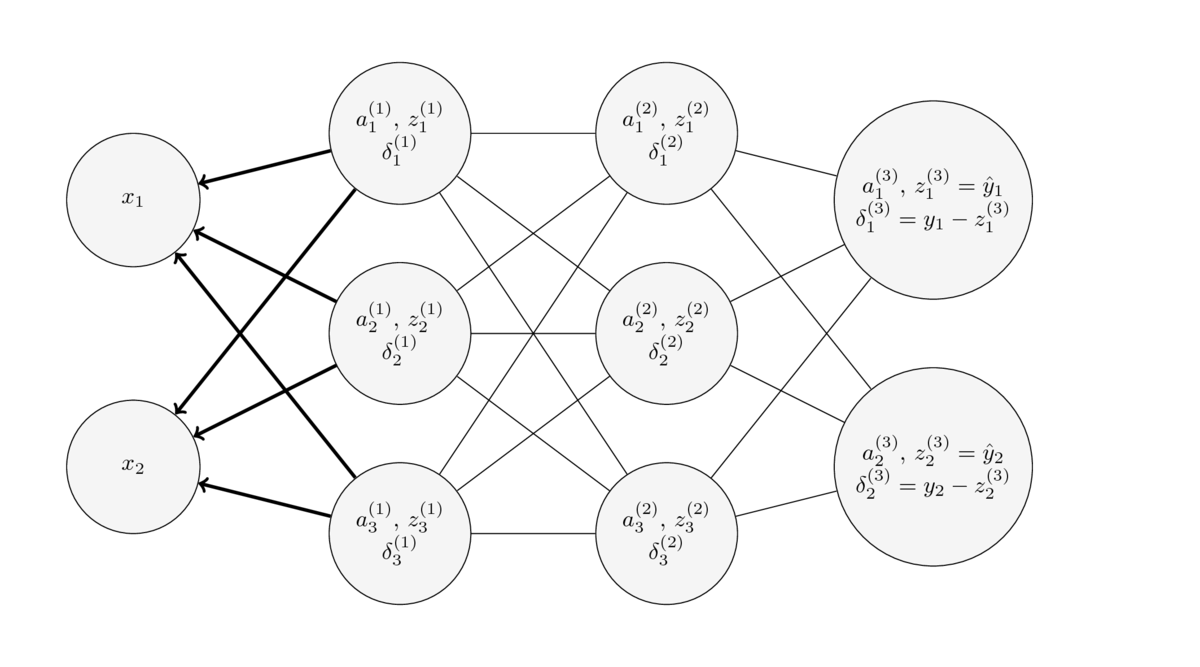

In [52]:
%%tikz --size 1200,800
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm, align=center]

\path (-2, -5) grid (16, 5);

\node[neuron, fill=gray!10] (i1) at (0,  2) {$x_1$};
\node[neuron, fill=gray!10] (i2) at (0, -2) {$x_2$};

\node[neuron, fill=gray!10] (h11) at (4,  3) {$a^{(1)}_1$, $z^{(1)}_1$ \\ $\delta^{(1)}_1$};
\node[neuron, fill=gray!10] (h12) at (4,  0) {$a^{(1)}_2$, $z^{(1)}_2$ \\ $\delta^{(1)}_2$};
\node[neuron, fill=gray!10] (h13) at (4, -3) {$a^{(1)}_3$, $z^{(1)}_3$ \\ $\delta^{(1)}_3$};
\draw[<-, line width=0.5mm] (i1) -- (h11);
\draw[<-, line width=0.5mm] (i2) -- (h11);
\draw[<-, line width=0.5mm] (i1) -- (h12);
\draw[<-, line width=0.5mm] (i2) -- (h12);
\draw[<-, line width=0.5mm] (i1) -- (h13);
\draw[<-, line width=0.5mm] (i2) -- (h13);

\node[neuron, fill=gray!10] (h21) at (8,  3) {$a^{(2)}_1$, $z^{(2)}_1$ \\ $\delta^{(2)}_1$};
\node[neuron, fill=gray!10] (h22) at (8,  0) {$a^{(2)}_2$, $z^{(2)}_2$ \\ $\delta^{(2)}_2$};
\node[neuron, fill=gray!10] (h23) at (8, -3) {$a^{(2)}_3$, $z^{(2)}_3$ \\ $\delta^{(2)}_3$};
\draw[-] (h11) -- (h21);
\draw[-] (h11) -- (h22);
\draw[-] (h11) -- (h23);
\draw[-] (h12) -- (h21);
\draw[-] (h12) -- (h22);
\draw[-] (h12) -- (h23);
\draw[-] (h13) -- (h21);
\draw[-] (h13) -- (h22);
\draw[-] (h13) -- (h23);

\node[neuron, fill=gray!10] (o1) at (12,  2) {$a^{(3)}_1$, $z^{(3)}_1=\hat{y}_1$ \\ $\delta^{(3)}_1 = y_1 - z^{(3)}_1$};
\node[neuron, fill=gray!10] (o2) at (12, -2) {$a^{(3)}_2$, $z^{(3)}_2=\hat{y}_2$ \\ $\delta^{(3)}_2 = y_2 - z^{(3)}_2$};
\draw[-] (h21) -- (o1);
\draw[-] (h21) -- (o2);
\draw[-] (h22) -- (o1);
\draw[-] (h22) -- (o2);
\draw[-] (h23) -- (o1);
\draw[-] (h23) -- (o2);

$$ \frac{\partial C}{\partial w^{(1)}_{jk}} = x_k \delta^{(1)}_j $$


## Backpropagation 의 증명

체인 규칙(chain rule)을 적용하면

$$
\begin{eqnarray}
  \delta^{(l)}_j & = & \frac{\partial C}{\partial a^{(l)}_j} \\
  & = & \sum_i \frac{\partial C}{\partial a^{(l+1)}_i} \frac{\partial a^{(l+1)}_i}{\partial a^{(l)}_j} \\ 
  & = & \sum_i \delta^{(l+1)}_i \frac{\partial a^{(l+1)}_i}{\partial a^{(l)}_j} 
\end{eqnarray}
$$


여기에서 

$$
\begin{eqnarray}
  a^{(l+1)}_i = \sum_j w^{(l+1)}_{ij} z^{(l)}_j + b^{(l+1)}_i = \sum_j w^{(l+1)}_{ij} h (a^{(l)}_j) + b^{(l+1)}_i
\end{eqnarray}
$$


$$
\begin{eqnarray}
  \frac{\partial a^{(l+1)}_i}{\partial a^{(l)}_j} = w^{(l+1)}_{ij} h '(a^{(l)}_j)
\end{eqnarray}
$$

를 적용하면



$$
\begin{eqnarray}
  \delta^{(l)}_j = \sum_i \delta^{(l+1)}_i w^{(l+1)}_{ij} h '(a^{(l)}_j) = h '(a^{(l)}_j) \sum_i \delta^{(l+1)}_i w^{(l+1)}_{ij} 
\end{eqnarray}
$$



$$
\frac{\partial C}{\partial w^{(l)}_{ji}} = \frac{\partial C}{\partial a^{(l)}_{j}}  \frac{\partial a^{(l)}_{j}}{\partial w^{(l)}_{ji}} 
= \delta^{(l)}_j z^{(l-1)}_i 
$$

같은 방법으로 

$$
\begin{eqnarray}  
\frac{\partial C}{\partial b^{(l)}_j} =   \delta^{(l)}_j
\end{eqnarray}
$$


##  Stochastic Gradient Descent

위에서 구한 코스트 그레디언트 값은 데이터 한 쌍 즉 $(x_i, y_i)$만을 이용하여 구한 값이다. 실제 코스트 함수 $C$는 모든 r개별 데이터에 대해 구한 코스트 $C_i$의 합이다.

$$ C = \sum_{i=1}^N C_i $$

따라서 전체 코스트에 대한 그레디언트 값은 각각의 개별 데이터에 대해 구한 그레디언트 값의 합이다.

$$ \dfrac{\partial C}{\partial w_k} = \sum_{i=1}^N \dfrac{\partial C_i}{\partial w_k} $$

이 그레디언트 값이 구해지면 가중치를 업데이트할 수 있다.

$$ w_{k+1} = w_k - \mu \dfrac{\partial C}{\partial w_k}  $$

그런데 트레이닝 데이터의 수가 많은 경우 모든 데이터를 다 사용하여 그레디언트를 구하면 그레디언트를 한 번 구하는데, 즉, 가중치를 한 번 업데이트하는데 드는 계산 시간이 너무 길어지므로 자주 업데이트를 할 수 없고 따라서 최종 가중치 값을 구하는데 시간이 너무 오래 걸린다. 

따라서 일부 데이터만 사용하여 일단 그레디언트의 근사값을 구하고 

$$ \tilde{\dfrac{\partial C}{\partial w_k}} = \sum_{i=1}^M \dfrac{\partial C_i}{\partial w_k} \;\;\;\; (M < N) $$

이 근사값을 이용하여 가중치를 업데이트하는 방법을 사용하는데 이를  Stochastic Gradient Descent 방법이라고 한다.

$$ w_{k+1} = w_k - \mu \tilde{\dfrac{\partial C}{\partial w_k}}  $$

## 신경망 정리

신경망의 계수는 다음과 같이 찾는다.

1. 초기화(initialize)
    * 모든 $w$, $b$ 값을 임의의 값으로 초기화
1. 입력 데이터(input) 
    * 하나의 data sample $x_i$로 입력 계층 설정
1. 순방향 전파(feedforward propagation)
    * 모든 뉴런에 대해 $a$, $z$값 계산
1. 오차 계산(output and error calculation)
    * 최종 출력 계층의 값 $z^{(L)}$ 및 오차 $\delta^{(L)}$ 계산
1. 오차 역전파(backpropagation)
    * 반대 방향으로 오차 $\delta$ 전파
1. 그레디언트 계산(gradient calculation)
    * data sample $x_i$에 의한 cost 미분값 $\frac{\partial C_i}{\partial w}=z\delta$, $\frac{\partial C_i}{\partial b}=\delta$ 계산
1. 반복(minibatch-size iteration)
    * 데이터 샘플을 $x_{i+1}$로 바꾸어 minibatch size 만큼 2~6 단계를 반복
1. 가중치 갱신(weight update)
    * mini batch size 만큼의 데이터를 사용한 후 그레디언트 $\frac{\partial C}{\partial w}$, $\frac{\partial C}{\partial b}$ 계산
    * 이 그레디언트 값으로 $w$, $b$ 값을 업데이트